<a href="https://colab.research.google.com/github/bingsen-wang/PowerElectronics/blob/main/VSI_NPC_motor_3phase_conductionStates.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>

<h1> <b>Conduction States of NPC 3-Level Voltage Source Inverter</b></h1>

Dr. Bingsen Wang

9/6/2024
</center>


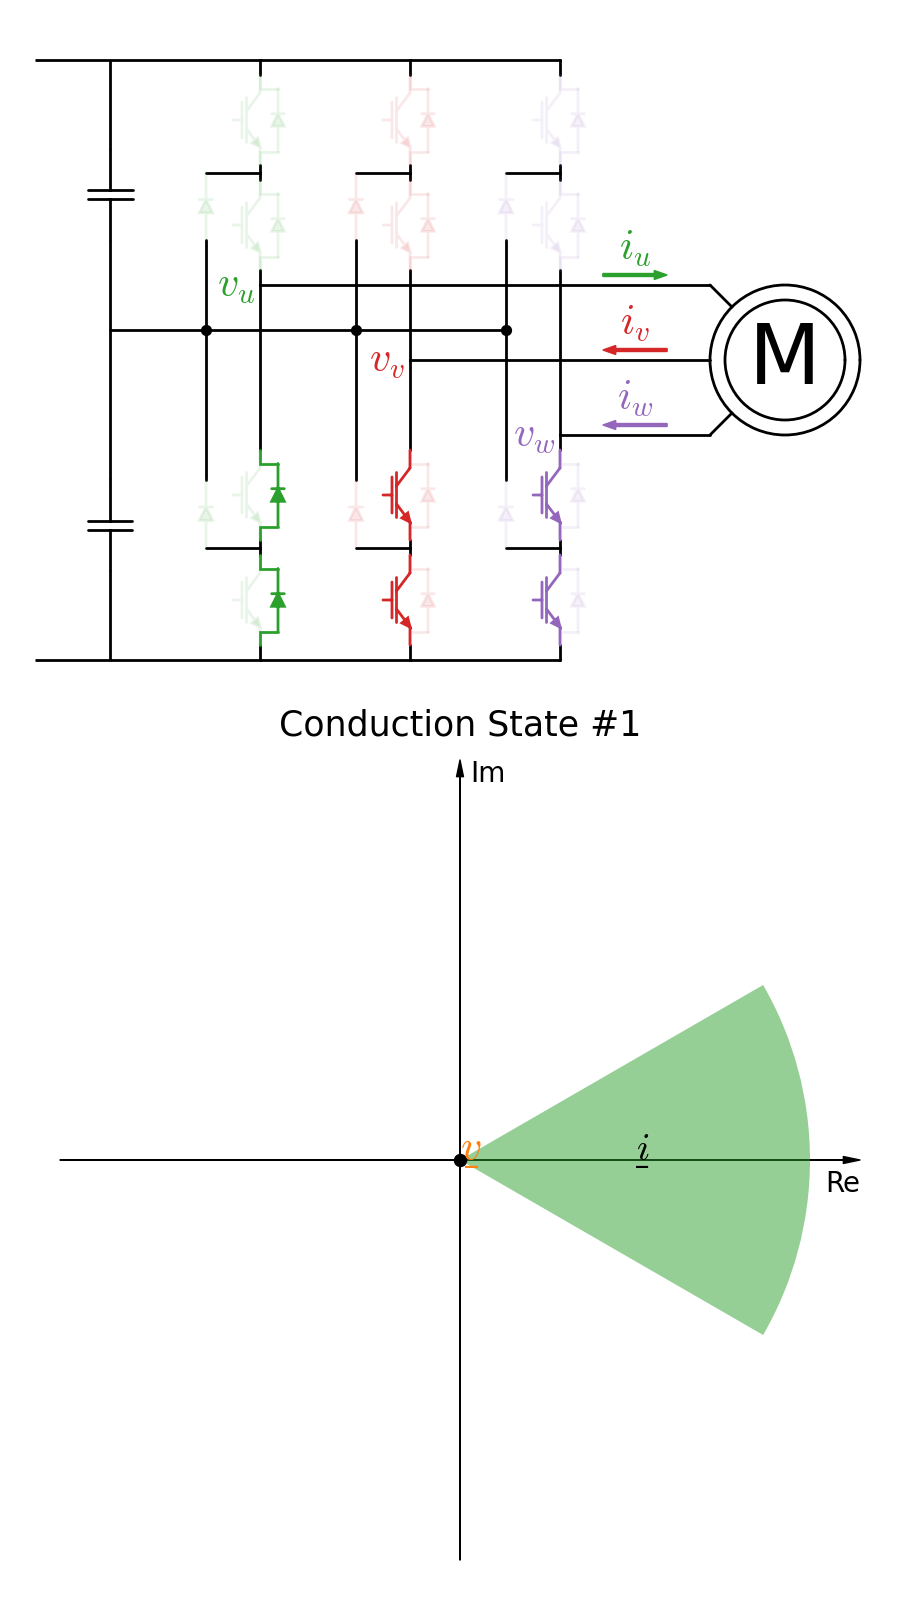

In [1]:
from os import linesep
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mp
from matplotlib.path import Path
from matplotlib import transforms,animation
from matplotlib.backends.backend_pdf import PdfPages
plt.rcParams.update({'font.family':"sans serif",'animation.html':'jshtml',"mathtext.fontset" : "cm"})

#draw diode symbol
def draw_diode(ax,x0,y0,h=1,theta=0,lw=1,color='k',alpha=1):
    verts=[(x0,y0),(x0,y0+.4*h), (x0,y0+.6*h),(x0,y0+h),(x0-.1*h,y0+.6*h),(x0+.1*h,y0+.6*h),
          (x0,y0+.6*h),(x0-.1*h,y0+.4*h),(x0+.1*h,y0+.4*h),(0,0)]
    codes=[Path.MOVETO,Path.LINETO]*4 + [Path.LINETO,Path.CLOSEPOLY]
    rot=transforms.Affine2D().rotate_deg_around(x0,y0,theta)+ax.transData
    ax.add_patch(mp.PathPatch(Path(verts,codes),color=color,alpha=alpha,lw=lw,capstyle='round',transform=rot))
    return

#draw IGBT symbol
def draw_igbt(ax,x0,y0,h=1,theta=0,lw=1,color='k',alpha=1):
    verts = [(x0,y0),(x0,y0+h*0.2),(x0,y0+h*0.2),(x0-h*0.15,y0+h*0.4),
             (x0-h*0.15,y0+h*0.6),(x0,y0+h*0.8),(x0,y0+h*0.8),(x0,y0+h),
             (x0-h*0.15,y0+h*0.25),(x0-h*0.15,y0+h*0.75),
             (x0-h*0.2,y0+h*0.3),(x0-h*0.2,y0+h*0.7),
             (x0-h*0.3,y0+h*0.5),(x0-h*0.2,y0+h*0.5),
             (x0,y0+h*0.2),(x0-0.025*h,y0+h*0.3),(x0-h*0.09,y0+h*0.245),(0,0)]
    codes = [Path.MOVETO,Path.LINETO]*8+[Path.LINETO,Path.CLOSEPOLY]
    rot=transforms.Affine2D().rotate_deg_around(x0,y0,theta)+ax.transData
    ax.add_patch(mp.PathPatch(Path(verts,codes),color=color,alpha=alpha,lw=lw,capstyle='round',transform=rot))
    return

#draw IGBT and diode in parallel
def draw_igbt_diode_parallel(ax,x0,y0,h=1,ss=1,ip=0,theta=0,lw=1,color='k'):
    """
    ss: switching state
    ip: current polarity
    """
    if ss==0:
        alpha_t,alpha_d = .1,.1
    else:
        if ip==0:
            alpha_t,alpha_d = 1,1
        elif ip==1:
            alpha_t,alpha_d = 1,.1
        elif ip==-1:
            alpha_t,alpha_d = .1,1
    draw_igbt(ax,x0,y0,h=h,theta=theta,lw=lw,color=color,alpha=alpha_t)
    dxy = (.2*h+1j*.15*h)*np.exp(1j*theta/180*np.pi)
    x0_d,y0_d=x0+dxy.real, y0+dxy.imag
    draw_diode(ax,x0_d,y0_d,h=.7*h,theta=theta,lw=lw,color=color,alpha=alpha_d)
    verts = [(x0,y0+h),(x0,y0+.85*h),(x0+.2*h,y0+.85*h),(x0,y0),(x0,y0+.15*h),(x0+.2*h,y0+.15*h)]
    codes = ([Path.MOVETO]+[Path.LINETO]*2)*2
    rot=transforms.Affine2D().rotate_deg_around(x0,y0,theta)+ax.transData
    ax.add_patch(mp.PathPatch(Path(verts,codes),ec=color,fc='None',alpha=alpha_d,lw=lw,capstyle='round',transform=rot))
    return

#draw capacitor symbol
def draw_capacitor(ax,x0,y0,h=1,theta=0,lw=1,color='k',alpha=1):
    dx,dy = (.1*h, .25*h)
    verts = [(x0,y0),(x0+h/2-dx/2,y0),(x0+h/2-dx/2,y0+dy),(x0+h/2-dx/2,y0-dy),
             (x0+h,y0),(x0+h/2+dx/2,y0),(x0+h/2+dx/2,y0+dy),(x0+h/2+dx/2,y0-dy)]
    codes = [Path.MOVETO,Path.LINETO]*4
    rot=transforms.Affine2D().rotate_deg_around(x0,y0,theta)+ax.transData
    ax.add_patch(mp.PathPatch(Path(verts,codes),ec=color,alpha=alpha,fc='None',lw=lw,capstyle='round',transform=rot))
    return

#draw 3-phase motor symbol
def draw_motor_3phase(ax,x0,y0,h=1,theta=0,lw=1,color='k',alpha=1):
    verts = [(x0,y0+.5*h),(x0+.5*h-.25*np.sqrt(2)*h,y0+.25*np.sqrt(2)*h),
             (x0,y0-.5*h),(x0+.5*h-.25*np.sqrt(2)*h,y0-.25*np.sqrt(2)*h)]
    verts += list(Path.arc(0,360).vertices*.5*h+np.array([x0+.5*h,y0]))
    verts += list(Path.arc(0,360).vertices*.4*h+np.array([x0+.5*h,y0]))
    codes = [Path.MOVETO,Path.LINETO]*2 + list(Path.arc(0,360).codes)*2
    rot=transforms.Affine2D().rotate_deg_around(x0,y0,theta)+ax.transData
    ax.add_patch(mp.PathPatch(Path(verts,codes),ec=color,alpha=alpha,fc='None',lw=lw,capstyle='round',transform=rot))
    ax.text(x0+.5*h,y0,'M',size=40*h,va='center',ha='center',transform=rot)
    return

#draw current polarity
def draw_current_polarity(ax,x0,y0,h=1,w=.15,theta=0,color='k'):
    rot=transforms.Affine2D().rotate_deg_around(x0,y0,theta)+ax.transData
    ax.add_patch(mp.Arrow(x0-h/2,y0,h,0,width=w,color=color,transform=rot)) #load current
    return


#draw NPC bridge - animated part
def draw_npc_bridge_anim(ax,x0,y0,h=6,w=3,ss_legs=[1]*3,ip=[0]*3,lw=1,color=['k']*3):
    for k in range(3):
        if ss_legs[k]==0:
            ss = [0,np.heaviside(ip[k],1),np.heaviside(-ip[k],1),0]
        else:
            ss = [[0,0,1,1],[0,1,1,0],[1,1,0,0]][int(ss_legs[k]+1)]
        draw_igbt_diode_parallel(ax,x0+k*w/3,y0+.325*h,h=.15*h,ss=ss[0],ip=ip[k],lw=lw,color=color[k]) #sw1
        draw_igbt_diode_parallel(ax,x0+k*w/3,y0-.475*h,h=.15*h,ss=ss[3],ip=-ip[k],lw=lw,color=color[k]) #sw4
        draw_igbt_diode_parallel(ax,x0+k*w/3,y0+.15*h,h=.15*h,ss=ss[1],ip=ip[k],lw=lw,color=color[k]) #sw2
        draw_igbt_diode_parallel(ax,x0+k*w/3,y0-.3*h,h=.15*h,ss=ss[2],ip=-ip[k],lw=lw,color=color[k]) #sw3
        if ss_legs[k]==0:
            draw_diode(ax,x0+k*w/3-.12*w,y0+.2*h,h=.1125*h,lw=lw,color=color[k],alpha=max(.1,ss[1]*ip[k])) # diode 5
            draw_diode(ax,x0+k*w/3-.12*w,y0-.3125*h,h=.1125*h,lw=lw,color=color[k],alpha=max(.1,-ss[2]*ip[k])) #diode 6
        else:
            draw_diode(ax,x0+k*w/3-.12*w,y0+.2*h,h=.1125*h,lw=lw,color=color[k],alpha=.1) # diode 5
            draw_diode(ax,x0+k*w/3-.12*w,y0-.3125*h,h=.1125*h,lw=lw,color=color[k],alpha=.1) #diode 6
        if ip[k]==0:
            draw_current_polarity(ax,x0+5*w/6,y0+.125*(1-k)*h+.1,h=w/7,color=color[k])
        else:
            draw_current_polarity(ax,x0+5*w/6,y0+.125*(1-k)*h+.1,h=w/7*ip[k],color=color[k])

    return

#draw NPC bridge - non-animate part
def draw_npc_bridge_non_anim(ax,x0,y0,h=6,w=3,lw=1,color=['k']*3):
    verts=[]
    for k in range(3):
        ax.text(x0+5*w/6,y0+.125*(1-k)*h+.25,['$i_u$','$i_v$','$i_w$'][k],size=30,color=color[k],ha='center')
        ax.text(x0+k*w/3-.05,y0+.125*(1-k)*h,['$v_u$','$v_v$','$v_w$'][k],size=30,color=color[k],ha='right',va='center')
        verts+=[
                (x0+k*w/3,y0+.5*h),(x0+k*w/3,y0+.475*h), #DC+ to SW1
                (x0+k*w/3,y0+.325*h),(x0+k*w/3,y0+.3*h), #SW1 to SW2
                (x0+k*w/3,y0+.15*h),(x0+k*w/3,y0-.15*h), #SW2 to SW3
                (x0+k*w/3,y0-.3*h),(x0+k*w/3,y0-.325*h), #SW3 to SW4
                (x0+k*w/3,y0-.475*h),(x0+k*w/3,y0-.5*h), #SW4 to DC-
                (x0+k*w/3,y0+.3125*h),(x0+k*w/3-.12*w,y0+.3125*h),#diode connection high
                (x0+k*w/3,y0-.3125*h),(x0+k*w/3-.12*w,y0-.3125*h),#diode connection low
                (x0+k*w/3-.12*w,y0+.2*h),(x0+k*w/3-.12*w,y0-.2*h),#diode connection high to low
                (x0+k*w/3,y0+.125*(1-k)*h),(x0+w,y0+.125*(1-k)*h) #ac lines
               ]
        ax.scatter(x0+k*w/3-.12*w,y0+.05*h,marker='o',s=50,color='k')
    verts += [(x0,y0+h/2),(x0+2*w/3,y0+h/2),#DC+
              (x0,y0-h/2),(x0+2*w/3,y0-h/2),#DC-
              (x0-w/3,y0+.05*h),(x0+2*w/3-.12*w,y0+.05*h) #neutral
             ]
    codes = [Path.MOVETO,Path.LINETO]*30
    ax.add_patch(mp.PathPatch(Path(verts,codes),lw=lw,capstyle='round'))
    return

def draw_dc_link(ax,x0,y0,h=5,w=2,lw=1,color='k'):
    draw_capacitor(ax,x0,y0+.2*h,h=.15*h,lw=lw,theta=90)
    draw_capacitor(ax,x0,y0-.35*h,h=.15*h,lw=lw,theta=90)
    verts = [(x0-w/3,y0+h/2),(x0+2*w/3,y0+h/2),(x0-w/3,y0-h/2),(x0+2*w/3,y0-h/2),
             (x0,y0+.5*h),(x0,y0+.35*h),(x0,y0+.2*h),(x0,y0-.2*h),(x0,y0-.35*h),(x0,y0-.5*h)]
    codes = [Path.MOVETO,Path.LINETO]*5
    ax.add_patch(mp.PathPatch(Path(verts,codes),lw=lw))
    return

def draw_inverter_motor_non_anim(ax,x0,y0,h=20/3,w=6,lw=2,color=['k']*3):
    draw_npc_bridge_non_anim(ax,x0,y0,h=h,w=w,lw=lw,color=color)
    draw_dc_link(ax,x0-w/3,y0,h=h,w=w/2,lw=lw)
    draw_motor_3phase(ax,x0+w,y0,h=.25*h,lw=lw)
    return

def draw_xy_axes(ax,x0,y0,xlim=[0,1],ylim=[0,1],xlabel='',ylabel='',w=.5,hw=5):
    ax.annotate("", xy=(xlim[1],y0),xytext=(xlim[0],y0),arrowprops=dict(headwidth=hw,width=w,color='k')) #x-axis
    ax.annotate("", xy=(x0,ylim[1]),xytext=(x0,ylim[0]),arrowprops=dict(headwidth=hw,width=w,color='k')) #y-axis
    ax.text(xlim[1],y0-.1,xlabel,size=20,va='top',ha='right')
    ax.text(x0+.1,ylim[1],ylabel,size=20,va='top',ha='left')
    return

def axis_reset(ax): #clear axis for redrawing
    xy=ax.axis(); ax.cla(); ax.axis('off'); ax.set(xlim=xy[:2],ylim=xy[-2:])
    return

def draw_space_vector(ax,x0,y0,sv,label='',color='k'):
    ax.annotate("", xy=(x0+sv.real,y0+sv.imag),xytext=(x0,y0),arrowprops=dict(headwidth=10,width=3,color=color))
    ax.text(x0+sv.real,y0+sv.imag,label,size=30,color=color)
    return

def abc2sv(abc):
    return 2/3*np.sum([abc[k]*np.exp(1j*k*np.pi*2/3) for k in range(3)])

def draw_current_vector_region(ax,x0,y0,r=1,theta=0,color='w'):
    ac = Path.arc(-30,30)
    verts = [(x0,y0)] + list(ac.vertices*r+np.array([x0,y0])) + [(0,0)]
    codes =[Path.MOVETO,Path.LINETO]+ list(ac.codes[1:]) + [Path.CLOSEPOLY]
    rot = transforms.Affine2D().rotate_deg_around(x0,y0,theta)+ax.transData
    ax.add_patch(mp.PathPatch(Path(verts,codes),ec='None',fc=color,alpha=.5,transform=rot))
    ax.text(x0+r/2,y0,r'$i\underbar$',size=28,transform=rot)
    return

#parameters
cs = list(mpl.cm.tab10.colors)[2:] + ['w','k'] #color sequence

# fig = plt.figure(figsize=(16,9)) #landscape
# ax = fig.add_axes((0,0,1,1),xlim=[0,16],ylim=[-4.5,4.5] ,fc='none')
# ax1 = fig.add_axes((0,0,1,1),xlim=[0,16],ylim=[-4.5,4.5] ,fc='none')
# ax.axis('off')
# x0,y0=3.5,0
fig = plt.figure(figsize=(9,16)) #portrait
ax = fig.add_axes((0,0,1,1),ylim=[0,16],xlim=[-4.5,4.5] ,fc='none')
ax1 = fig.add_axes((0,0,1,1),ylim=[0,16],xlim=[-4.5,4.5] ,fc='none')
ax.axis('off')
x0,y0=[-2,0],[12.5,4.5]
draw_xy_axes(ax,x0[1],y0[1],xlim=[x0[1]-4,x0[1]+4],ylim=[y0[1]-4,y0[1]+4],xlabel='Re',ylabel='Im',w=.2)
sv,ss=[],[]
for a in range(3):
    for b in range(3):
        for c in range(3):
            sv+=[abc2sv([a,b,c])]
            ss+=[[a-1,b-1,c-1]]
sv=np.array(sv)
ip = [[1,-1,-1],[1,1,-1],[-1,1,-1],[-1,1,1],[-1,-1,1],[1,-1,1]]
def animate(ii):
    # ii=66
    i = int(ii/6)
    k = ii%6
    axis_reset(ax1)
    draw_npc_bridge_anim(ax1,x0[0],y0[0],h=6,w=4.5,lw=2,ss_legs=ss[i],ip=ip[k],color=cs)
    draw_current_vector_region(ax1,x0[1],y0[1],r=3.5,theta=k*60,color=cs[(3-k)%3])
    draw_space_vector(ax1,x0[1],y0[1],sv[i]*2.9,label=r'$v \underbar$',color='tab:orange')
    ax1.text(x0[1],y0[1]+4.25,'Conduction State #{}'.format(ii+1),size=25,ha='center')
    ax1.scatter(x0[1]+2.9*sv[:i+1].real,y0[1]+3*sv[:i+1].imag,marker='o',s=75,color='k')
    return

# with PdfPages("VSI_NPC_conduction_States.pdf") as pdf: #save to pdf
    # for k in range(48):
    #     animate(k)
    #     pdf.savefig()
draw_inverter_motor_non_anim(ax,x0[0],y0[0],h=6,w=4.5,lw=2,color=cs)
anim = animation.FuncAnimation(fig, animate, interval=1000/4, frames=27*6)
# anim
anim.save("VSI_NPC_conductionStates.mp4", writer=animation.FFMpegWriter(fps=2), dpi=200)
